# Machine Learning and Data Analysis
----------------------------------------------
### *Session 6.1*


```
10th November, 2023
Anna Pallarès López
Computer Engineering Master's

```

In [1]:
# we first download from the internet the mnist dataset (bw)
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [25]:
# input variables and target variables
X = mnist.data
Y = mnist.target

In [26]:
# convert to numpy matrixes
X = X.to_numpy()
Y = Y.to_numpy()

In [27]:
# we convert the target into a number
import numpy as np
Y = np.asarray([eval(i) for i in Y])

In [28]:
# negative and positive digits
dn = 0
dp = 1
mask = (Y == dn) | (Y == dp)
X = X[mask, :]
Y = Y[mask]
Y[Y == dn] = -1
Y[Y == dp] = +1

In [29]:
from random import sample
n = 100
nt = 1000
mask = np.asarray(sample(range(X.shape[0]),n+nt))
X = X[mask,:]
Y = Y[mask]
mask = range(n,n+nt)
Xt = X[mask,]
Yt = Y[mask]
mask = range(0,n)
X = X[mask,]
Y = Y[mask]

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
M = SVC(C = 1, kernel = 'linear')
M.fit(X,Y)
Yp = M.predict(Xt)

err = np.mean(Yp * Yt <= 0)
print(err)
print(confusion_matrix(Yt,Yp))

0.002
[[481   2]
 [  0 517]]


In [34]:
# coeficients in the primal
M.coef_
M.coef_.shape

(1, 784)

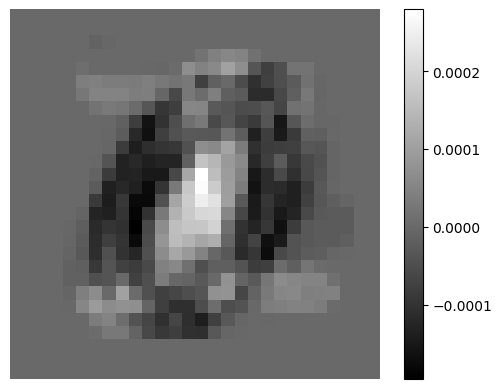

In [36]:
import matplotlib.pyplot as plt

w = M.coef_
picture = np.reshape(w,(28,28))
fig, ax = plt.subplots()
plt.imshow(picture, cmap=plt.cm.gray)
ax.axis('off')
plt.colorbar()

# we can see that the

In [39]:
# dual formulation, one element for each sample
# in the dual formulation we have sparsity so many of the x are not useful
# many points have alpha = to 0 so they are omited. That is why we have 25 points and not 100
alpha = M.dual_coef_
alpha.shape

(1, 25)

In [43]:
# lets see the 25 elements
print(M.support_)
print(M.support_.shape)

[ 3 15 24 29 33 44 62 65 71 85 88 92 96  2 13 21 30 46 49 53 70 89 94 95
 99]
(25,)


In [55]:
# f(x) = w x + b
# now lets search the bias, b (intercept)
# we can see that there is compression in my data

w = M.coef_
b = M.intercept_
i = 3
#i_dual = 1
f = np.dot(w,X[i,]) + b

print(f)
print(Y[i])
#print(Y[i]*alpha[0,i_dual])


[-1.00016588]
-1


In [59]:
from sklearn.svm import LinearSVC
M = LinearSVC(C = .01, penalty = "l2" )
M.fit(X,Y)
Yp = M.predict(Xt)

err = np.mean(Yp * Yt <= 0)
print(err)
print(confusion_matrix(Yt,Yp))

0.004
[[480   3]
 [  1 516]]


In [65]:
M1 = SVC(C = .01, kernel = 'linear')
M1.fit(X,Y)

M2 = LinearSVC(C = .01, penalty = "l2" )
M2.fit(X,Y)

LinearSVC(C=0.01)

In [66]:
print(M1.intercept_)
print(M2.intercept_)


[0.4384681]
[8.05020556e-07]


In [67]:
print(np.abs(M1.intercept_-M2.intercept_))

[0.43846729]


In [69]:
print(np.mean(np.abs(M1.coef_-M2.coef_)))

1.0248729806960025e-05


**Why are both coeficient models so differents?**

When used l2 it is used the squared hinge. So the diference between linearsvm and svm lies on the loss function (hinge loss vs squared hinge loss).




In [76]:
M1 = SVC(C = .01, kernel = 'linear')
M1.fit(X,Y)

M2 = LinearSVC(C = .01, loss = "squared_hinge", penalty = "l1", dual = False )
M2.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.01, dual=False, penalty='l1')

In [80]:
# now we check and get sparsity on the dual formuation
print(sum(sum(M1.coef_ != 0 ))) # background features
print(sum(sum(M2.coef_ != 0 ))) # features that are important for our prediction

413
20


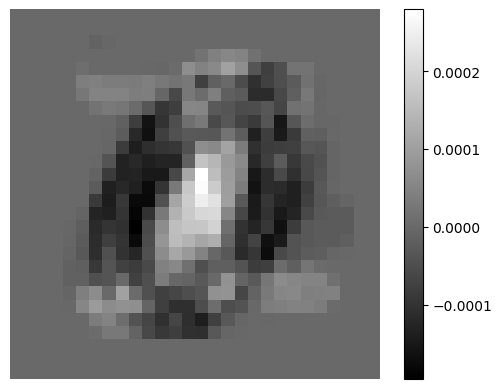

In [81]:
w = M1.coef_
picture = np.reshape(w,(28,28))
fig, ax = plt.subplots()
plt.imshow(picture, cmap=plt.cm.gray)
ax.axis('off')
plt.colorbar()

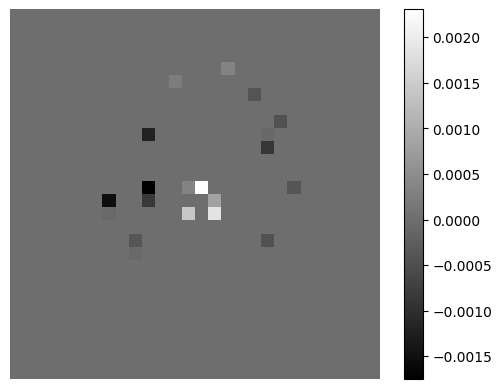

In [82]:
w = M2.coef_
picture = np.reshape(w,(28,28))
fig, ax = plt.subplots()
plt.imshow(picture, cmap=plt.cm.gray)
ax.axis('off')
plt.colorbar()

In this example we have a clear biased ML model because of the majority people is right-handed. Most of rh people write the 1 begining from the diagonal.